In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline
import scipy.stats as stats
import statsmodels as sm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Data Load In 

In [2]:
import Scripts_SigNonSig
reload(Scripts_SigNonSig)
from Scripts_SigNonSig import * 

In [3]:
out = get_data_for_sig_nonsig_analyses()
df_50_nonsig = out['df_50_nonsig']
df_50_sig = out['df_50_sig']
df_50 = out['df_50']


/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
Scripts_SigNonSig.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  region_data_single_row['Accuracy.50'] = np.mean(region_data['Accuracy.50'])
Scripts_SigNonSig.py:157: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_50_sig = df_50_sig.sort('PID') ## careful with the soring #
Scripts_SigNonSig.py:165: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df_50_nonsig = df_50_nonsig.sort('PID') ## Careful with the sorting ##


In [4]:
df_50['Accuracy.50'].std()

0.08135736238320843

In [5]:
df_50_sig['Accuracy.50'].std()

0.08019284585593889

# Boot-Strap Both Distributions

In [6]:
import Scripts_Hierarchical_Boot
reload(Scripts_Hierarchical_Boot)
from Scripts_Hierarchical_Boot import * 

In [7]:
hierarchical_boot(df_50,savetitle='full',save=True)


{'mean': array([ 0.57868632,  0.56087086,  0.578437  , ...,  0.56595737,
         0.58134829,  0.56554353]),
 'perc95': array([ 0.78  ,  0.71  ,  0.7679, ...,  0.72  ,  0.74  ,  0.71  ])}

# Load Back In 

In [8]:
boot_results = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_full.npz')

In [9]:
x = np.linspace(0,1,100) # what range for cdf # 
epcdf_store = boot_results['epcdf_store']
eppdf_store = boot_results['eppdf_store']
meann = boot_results['meann']
mediann = boot_results['mediann']
meann_study=boot_results['meann_study']
prob_less_than_62 = boot_results['prob_less_than_62']
perc95 = boot_results['perc95']
mean_max = boot_results['mean_max']


# CDF and PDF Plots 

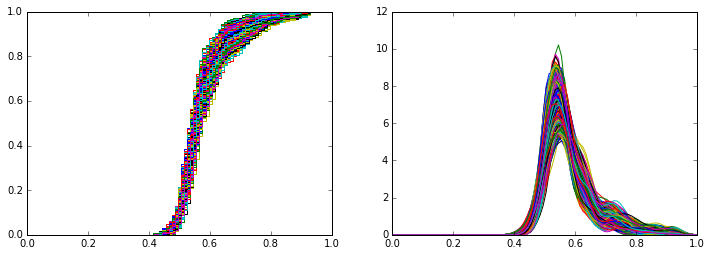

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.step(x, epcdf_store.T);
ax2.plot(x, eppdf_store.T);


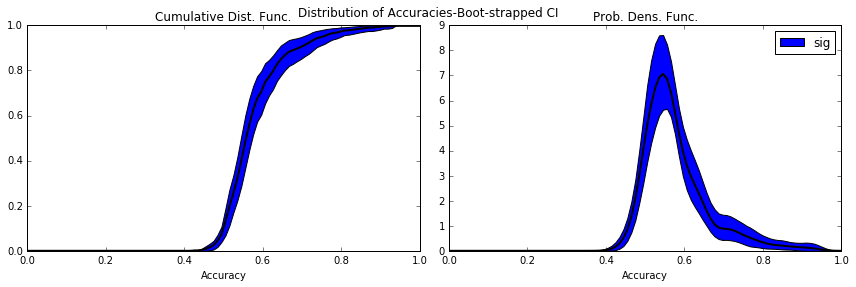

In [11]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

# cdf
upci = np.percentile(epcdf_store,97.5,axis=0)
loci = np.percentile(epcdf_store,2.5,axis=0)
ax1.plot(x,np.mean(epcdf_store,axis=0),linewidth=2,color='black')
ax1.fill_between(x,upci,loci)

##### PDF 

# significant 
upci = np.percentile(eppdf_store,97.5,axis=0)
loci = np.percentile(eppdf_store,2.5,axis=0)
ax2.plot(x,np.mean(eppdf_store,axis=0),linewidth=2,color='black')
ax2.fill_between(x,upci,loci,label='sig')


ax1.set_title('Cumulative Dist. Func.')
ax2.set_title('Prob. Dens. Func.')

ax1.set_xlabel('Accuracy')
ax2.set_xlabel('Accuracy')
plt.legend()
plt.suptitle('Distribution of Accuracies-Boot-strapped CI',fontsize=12)
plt.tight_layout()
#plt.savefig('distributions_cdf_pdf_boot_all_data.png')


In [12]:
#len(df_50_sig)

In [13]:
print('prob less than 62')
print(np.percentile(prob_less_than_62,95))
print(np.mean(prob_less_than_62))
print(np.percentile(prob_less_than_62,5))

print('mean')
print(np.percentile(meann,95))
print(np.mean(meann))
print(np.percentile(meann,5))
print(np.percentile(meann,95)-np.percentile(meann,5))

print('study mean mean')
print(np.percentile(meann_study,95))
print(np.mean(meann_study))
print(np.percentile(meann_study,5))
print(np.percentile(meann_study,95)-np.percentile(meann_study,5))

print('median')
print(np.percentile(mediann,95))
print(np.mean(mediann))
print(np.percentile(mediann,5))


print('perc95')
print(np.percentile(perc95,95))
print(np.mean(perc95))
print(np.percentile(perc95,5))

print('mean_maxes')
print(np.percentile(mean_max,95))
print(np.mean(mean_max))
print(np.percentile(mean_max,5))



prob less than 62
0.839006862181
0.773492001858
0.703219867107
mean
0.591661022406
0.577341663251
0.563084724796
0.0285762976103
study mean mean
0.605426000863
0.590957771424
0.577404168046
0.0280218328172
median
0.57
0.557410525
0.55
perc95
0.79
0.745877925
0.71
mean_maxes
0.657256513158
0.638498766447
0.621281578947


In [15]:
np.mean(df_50['Accuracy.50']<np.mean(meann))

0.63055872291904214